<a href="https://colab.research.google.com/github/Pradyumna9452/capstone-project-3/blob/main/Credit_card_default_prediction_3rd_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **About this Project:**

This is a Machine learning Capstone project. It is a Classification problem statement.

This project is done for Almabetter pro Program.

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.

# <b><u> Project Title : Predicting whether a customer will default on his/her credit card </u></b>

## <b> Problem Description </b>

### This project is aimed at predicting the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. We can use the [K-S chart](https://www.listendata.com/2019/07/KS-Statistics-Python.html) to evaluate which customers will default on their credit card payments


## <b> Data Description </b>

### <b>Attribute Information: </b>

### This research employed a binary variable, default payment (Yes = 1, No = 0), as the response variable. This study reviewed the literature and used the following 23 variables as explanatory variables:
* ### X1: Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit.
* ### X2: Gender (1 = male; 2 = female).
* ### X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others).
* ### X4: Marital status (1 = married; 2 = single; 3 = others).
* ### X5: Age (year).
* ### X6 - X11: History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.
* ### X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005.
* ### X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005.

# **Importing**

In [13]:
# Importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, roc_auc_score, confusion_matrix, roc_curve, auc

from sklearn.svm import SVC
from sklearn.model_selection import train_test_split # to split the data into two parts
from sklearn.linear_model import LogisticRegression # to apply the Logistic regression
from sklearn.feature_selection import RFE

from sklearn import svm
from sklearn.model_selection import KFold # for cross validation
from sklearn.model_selection import GridSearchCV # for tuning parameter
from sklearn.model_selection import RandomizedSearchCV  # Randomized search on hyper parameters.
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.pipeline import Pipeline 
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier #KNN
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

import os
#print(os.listdir("../input"))

In [14]:
#data path locator
path='/content/drive/MyDrive/csvfile/default of credit card clients.csv'

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [16]:
#creating data set  variable
cred_df=pd.read_csv(path,header=1)

In [17]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

## **Dataset Inspection**

In [18]:
#reading the data set
cred_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [19]:
#dataset information
cred_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16382 entries, 0 to 16381
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          16382 non-null  int64
 1   LIMIT_BAL                   16382 non-null  int64
 2   SEX                         16382 non-null  int64
 3   EDUCATION                   16382 non-null  int64
 4   MARRIAGE                    16382 non-null  int64
 5   AGE                         16382 non-null  int64
 6   PAY_0                       16382 non-null  int64
 7   PAY_2                       16382 non-null  int64
 8   PAY_3                       16382 non-null  int64
 9   PAY_4                       16382 non-null  int64
 10  PAY_5                       16382 non-null  int64
 11  PAY_6                       16382 non-null  int64
 12  BILL_AMT1                   16382 non-null  int64
 13  BILL_AMT2                   16382 non-null  int64
 14  BILL_A

No Null VALUES AND NO CATEGORICAL VARIABLE

In [20]:
#dataset no of ros and columns
cred_df.shape

(16382, 25)

In [21]:
 #data information respect to diffrent statistics
 cred_df.describe(include='all')

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,16382.00000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000,...,16382.000000,16382.000000,16382.000000,16382.000000,1.638200e+04,16382.000000,16382.000000,16382.000000,16382.000000,16382.000000
mean,8191.50000,165568.531315,1.589305,1.822305,1.562019,35.389696,0.008668,-0.127457,-0.151935,-0.225186,...,40738.508058,39348.042852,37931.232084,5600.457820,5.856574e+03,4601.517947,4846.510194,4862.079661,5208.341778,0.226041
std,4729.22039,130191.959505,0.491975,0.766640,0.523456,9.236107,1.118212,1.199472,1.215070,1.152450,...,61651.057752,59750.561031,59200.699733,15531.396484,2.256711e+04,15400.825538,15619.513769,15730.406204,18111.105857,0.418279
min,1.00000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-37594.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4096.25000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2039.250000,1550.000000,1050.000000,934.000000,6.500000e+02,291.000000,224.250000,210.000000,0.000000,0.000000
50%,8191.50000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,18469.500000,17731.500000,16287.000000,2100.000000,2.000000e+03,1500.000000,1500.000000,1500.000000,1390.000000,0.000000
75%,12286.75000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,50196.750000,49364.250000,48384.250000,5001.000000,5.000000e+03,4000.000000,4000.000000,4000.000000,4000.000000,0.000000
max,16382.00000,1000000.000000,2.000000,6.000000,3.000000,75.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,505000.000000,1.684259e+06,896040.000000,497000.000000,417990.000000,528666.000000,1.000000


# **Thought Process**

**1**-first see the discret value of column and then assign the categorical value to a perticular value for the better visualization

2-check the class imbalance and if it is, so use SMOTE for balance data set

In [22]:
cred_df.shape

(16382, 25)

## **Handling Missing Data**

In [23]:
# Missing Value Count Function
def show_missing():
    missing = cred_df.columns[cred_df.isnull().any()].tolist()
    return missing

# Missing data counts and percentage
print('Missing Data Count')
print(cred_df[show_missing()].isnull().sum().sort_values(ascending = False))
print('--'*50)
print('Missing Data Percentage')
print(round(cred_df[show_missing()].isnull().sum().sort_values(ascending = False)/len(cred_df)*100,2))

Missing Data Count
Series([], dtype: float64)
----------------------------------------------------------------------------------------------------
Missing Data Percentage
Series([], dtype: float64)


In [24]:
cred_df.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

**Depenedent varaible rename**

In [25]:
#renaming for better convinience
cred_df.rename(columns={'default payment next month' : 'IsDefaulter'}, inplace=True)

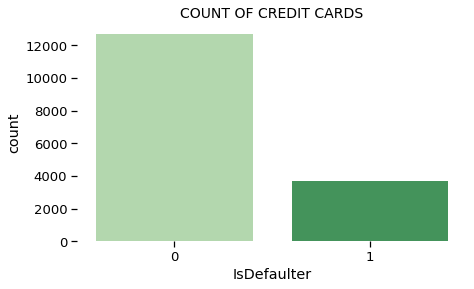

In [26]:
# The frequency of defaults
yes = cred_df.IsDefaulter.sum()
no = len(cred_df)-yes

# Percentage
yes_perc = round(yes/len(cred_df)*100, 1)
no_perc = round(no/len(cred_df)*100, 1)

import sys 
plt.figure(figsize=(7,4))
sns.set_context('notebook', font_scale=1.2)
sns.countplot('IsDefaulter',data=cred_df, palette="Greens")
plt.annotate('Non-default: {}'.format(no), xy=(-0.3, 15000), xytext=(-0.3, 3000), size=12)
plt.annotate('Default: {}'.format(yes), xy=(0.7, 15000), xytext=(0.7, 3000), size=12)
plt.annotate(str(no_perc)+" %", xy=(-0.3, 15000), xytext=(-0.1, 8000), size=12)
plt.annotate(str(yes_perc)+" %", xy=(0.7, 15000), xytext=(0.9, 8000), size=12)
plt.title('COUNT OF CREDIT CARDS', size=14)
#Removing the frame
plt.box(False);

In [27]:
# after rename the table we inspect our data set
cred_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [28]:
#target value count
cred_df['IsDefaulter'].value_counts()

0    12679
1     3703
Name: IsDefaulter, dtype: int64

"major no........" class imbalance

**Catogerical variable**

In [31]:
# find categorical variables
categorical = [var for var in cred_df.columns if cred_df[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))

There are 0 categorical variables


**Numerical variable**

In [32]:
# find Numerical variables
numerical = [var for var in cred_df.columns if cred_df[var].dtype!='O']
print('There are {} numerical variables'.format(len(numerical)))

There are 25 numerical variables


D**iscrete varaiable**

In [33]:
#for finding the discrete value
discrete = []
for var in numerical:
    if len(cred_df[var].unique())<20:
        print(var, ' values: ', cred_df[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

SEX  values:  [2 1]
EDUCATION  values:  [2 1 3 5 4 6 0]
MARRIAGE  values:  [1 2 3 0]
PAY_0  values:  [ 2 -1  0 -2  1  3  4  8  7  5  6]
PAY_2  values:  [ 2  0 -1 -2  3  5  7  4  1  6  8]
PAY_3  values:  [-1  0  2 -2  3  4  6  7  1  5  8]
PAY_4  values:  [-1  0 -2  2  3  4  5  7  6  1  8]
PAY_5  values:  [-2  0 -1  2  3  5  4  7  8  6]
PAY_6  values:  [-2  2  0 -1  3  6  4  7  8  5]
IsDefaulter  values:  [1 0]
There are 10 discrete variables


In [35]:
# for categorical value count
cred_df['SEX'].value_counts()

2    9654
1    6728
Name: SEX, dtype: int64

In [36]:
cred_df['SEX'].value_counts()

2    9654
1    6728
Name: SEX, dtype: int64

 1 = graduate school; 
 
 2 = university; 
 
 3 = high school; 
 
 4 = others

In [37]:
# for categorical value count
cred_df['EDUCATION'].value_counts()

2    7636
1    5990
3    2574
5     113
4      40
6      24
0       5
Name: EDUCATION, dtype: int64

In [38]:
# replacing the some value which is out of categoie
fil = (cred_df['EDUCATION'] == 5) | (cred_df['EDUCATION'] == 6) | (cred_df['EDUCATION'] == 0)
cred_df.loc[fil, 'EDUCATION'] = 4
cred_df['EDUCATION'].value_counts()

2    7636
1    5990
3    2574
4     182
Name: EDUCATION, dtype: int64

In [39]:
# for categorical value count
cred_df['MARRIAGE'].value_counts()

2    8823
1    7331
3     204
0      24
Name: MARRIAGE, dtype: int64

we assign the digit to the categories

1-married

2-single

3-other
replace the all the 0 vale catg to other 

In [40]:
# replacing the some value which is out of categoie
fil = cred_df['MARRIAGE'] == 0
cred_df.loc[fil, 'MARRIAGE'] = 3
cred_df['MARRIAGE'].value_counts()

2    8823
1    7331
3     228
Name: MARRIAGE, dtype: int64

Let's plot for our categorical variable

In [41]:
#creating variable for categorie
categ_features = ['SEX', 'EDUCATION', 'MARRIAGE']

In [42]:
# storing again in the main data set
cred_df_cat = cred_df[categ_features]
cred_df_cat['Defaulter'] = cred_df['IsDefaulter']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [43]:
#again replacing the numerical vaule  to categorical vaule 
cred_df_cat.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


<Figure size 1080x576 with 0 Axes>

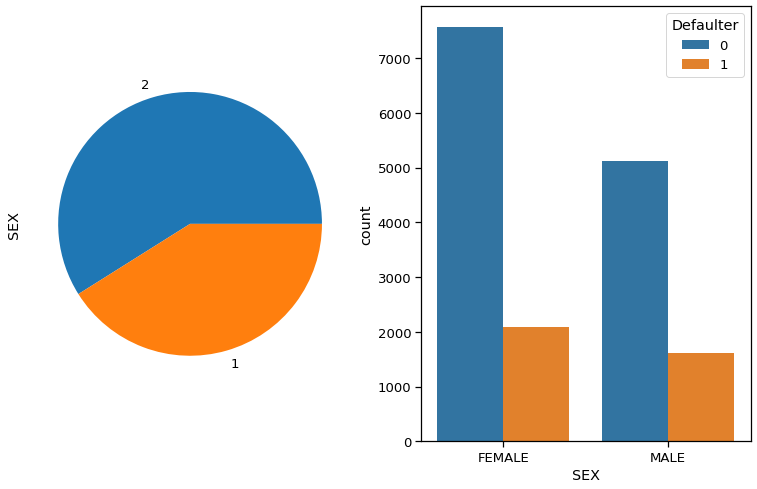

<Figure size 1080x576 with 0 Axes>

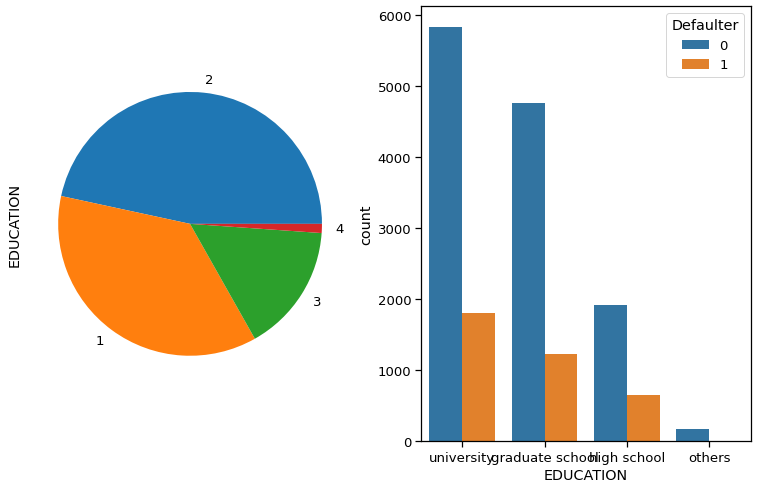

<Figure size 1080x576 with 0 Axes>

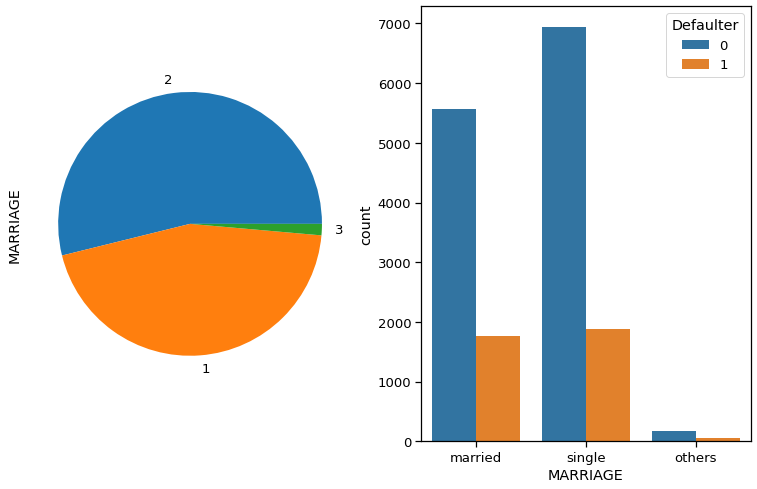

In [44]:
#plot for all the respective categorical variable
for col in categ_features:
  plt.figure(figsize=(15,8))
  fig, axes = plt.subplots(ncols=2,figsize=(13,8))
  cred_df[col].value_counts().plot(kind="pie",ax = axes[0],subplots=True)## you can make change in the plot
  sns.countplot(x = col, hue = 'Defaulter', data = cred_df_cat)

we have few observations for categorical features:




*   dataset have more females credit card holder,so number of defaulter have high proportion of females.
*   Number of defaulters have a higher possibility thoat he is educated people  (graduated from  school and university)
*  Number of defaulters have a higher proportion of Singles.

In [45]:
# check the max limit balance
cred_df['LIMIT_BAL'].max()

1000000

In [46]:
# check the min limit balance
cred_df['LIMIT_BAL'].min()

10000

In [47]:
# check for outlier in the limit column
cred_df['LIMIT_BAL'].describe()

count      16382.000000
mean      165568.531315
std       130191.959505
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: LIMIT_BAL, dtype: float64

no worry for the outlier

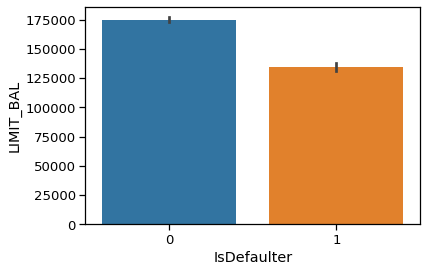

In [49]:
#plot for the limit balance and defaulter respect to them
sns.barplot(x='IsDefaulter', y='LIMIT_BAL', data=cred_df)

we observe that more the amount limit means more no of chanse of defaulter

In [50]:
#rename the columns
cred_df.rename(columns={'PAY_0':'PAY_SEPT','PAY_2':'PAY_AUG','PAY_3':'PAY_JUL','PAY_4':'PAY_JUN','PAY_5':'PAY_MAY','PAY_6':'PAY_APR'},inplace=True)
cred_df.rename(columns={'BILL_AMT1':'BILL_AMT_SEPT','BILL_AMT2':'BILL_AMT_AUG','BILL_AMT3':'BILL_AMT_JUL','BILL_AMT4':'BILL_AMT_JUN','BILL_AMT5':'BILL_AMT_MAY','BILL_AMT6':'BILL_AMT_APR'}, inplace = True)
cred_df.rename(columns={'PAY_AMT1':'PAY_AMT_SEPT','PAY_AMT2':'PAY_AMT_AUG','PAY_AMT3':'PAY_AMT_JUL','PAY_AMT4':'PAY_AMT_JUN','PAY_AMT5':'PAY_AMT_MAY','PAY_AMT6':'PAY_AMT_APR'},inplace=True)

In [51]:
#after rename the columns
cred_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [52]:
#age column value remains on int type 
cred_df['AGE']=cred_df['AGE'].astype('int')

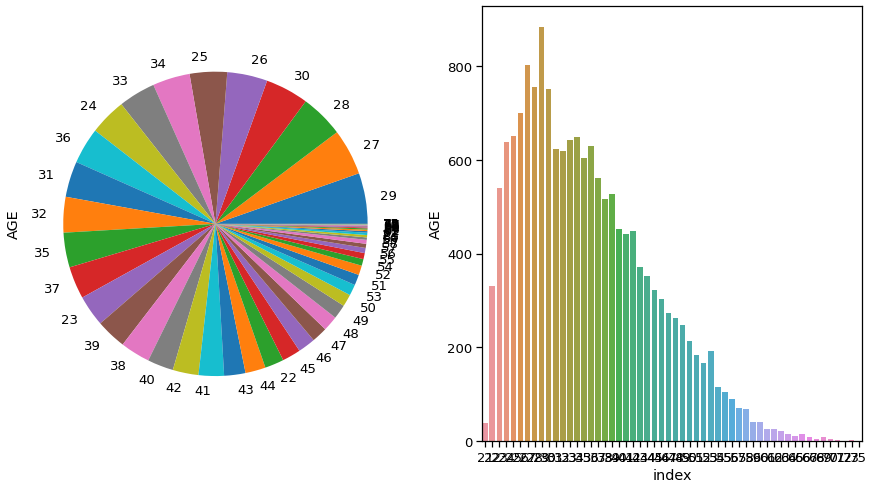

In [53]:
#plot for the age to defaulter relation
fig, axes = plt.subplots(ncols=2,figsize=(15,8))
age_df=cred_df['AGE'].value_counts().reset_index()
cred_df['AGE'].value_counts().plot(kind="pie",ax = axes[0],subplots=True)  # find more intutive plot
sns.barplot(x='index',y='AGE',data=age_df,ax = axes[1],orient='v')

In [54]:
#after grouby and replace by mean value
cred_df.groupby('IsDefaulter')['AGE'].mean()

IsDefaulter
0    35.362568
1    35.482582
Name: AGE, dtype: float64

In [55]:
#remain int type
cred_df = cred_df.astype('int')

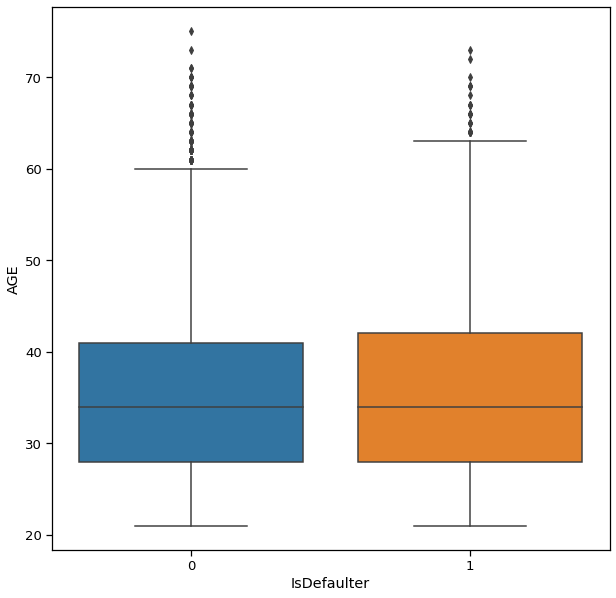

In [56]:
#for outlier detection box plot 
plt.figure(figsize=(10,10))
ax = sns.boxplot(x="IsDefaulter", y="AGE", data=cred_df)

**BILL DETAILS**

In [57]:
# perapre for pair plot 
bill_df = cred_df[['BILL_AMT_SEPT',	'BILL_AMT_AUG',	'BILL_AMT_JUL',	'BILL_AMT_JUN',	'BILL_AMT_MAY',	'BILL_AMT_APR']]

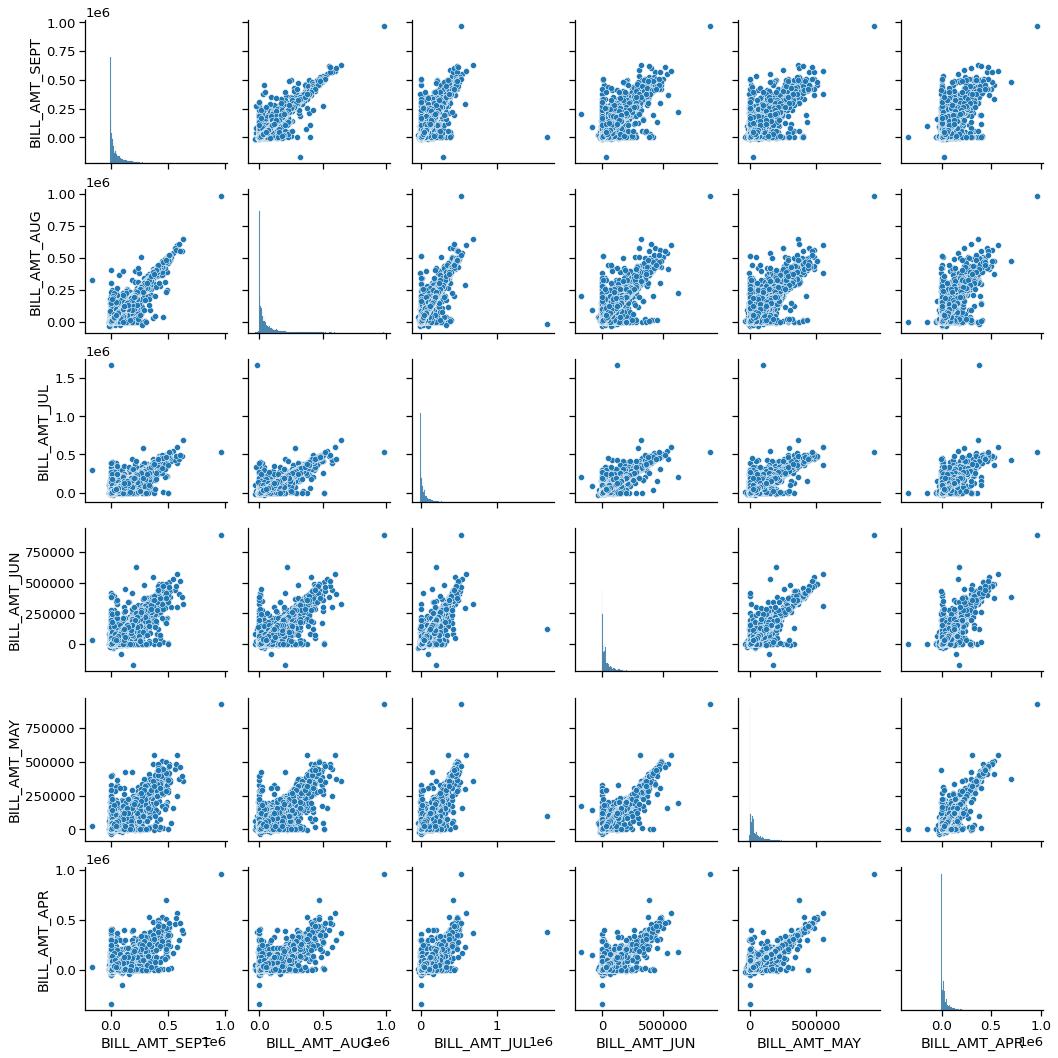

In [58]:
#pair plot
sns.pairplot(data=bill_df)

**observation on payment history**

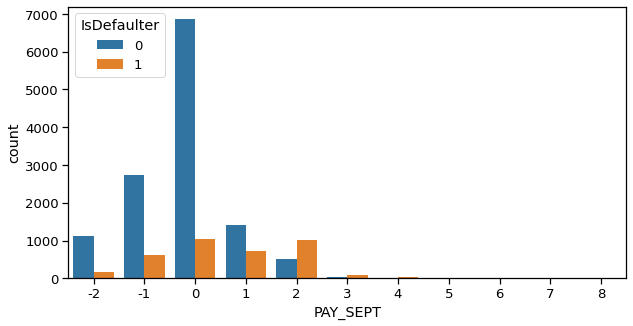

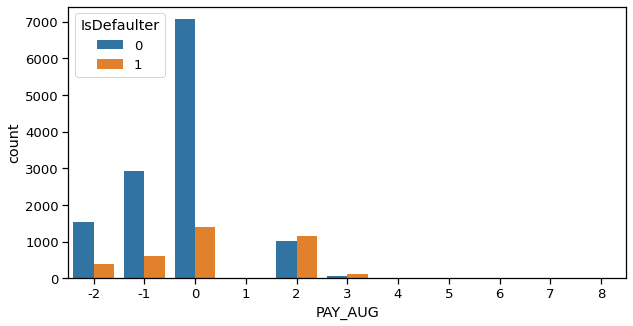

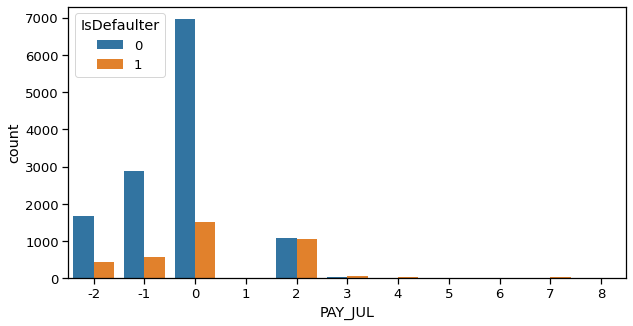

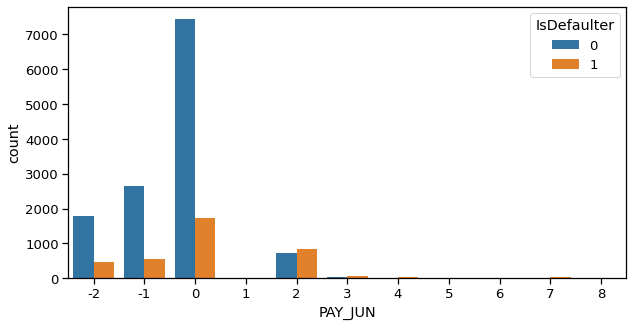

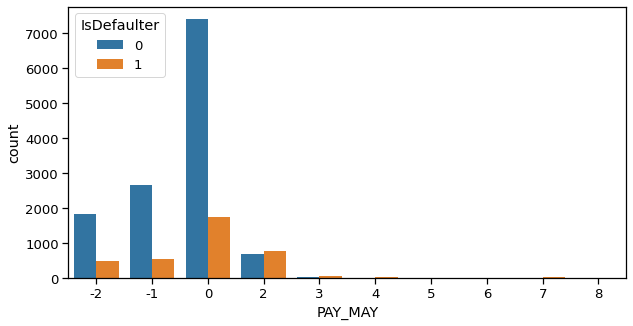

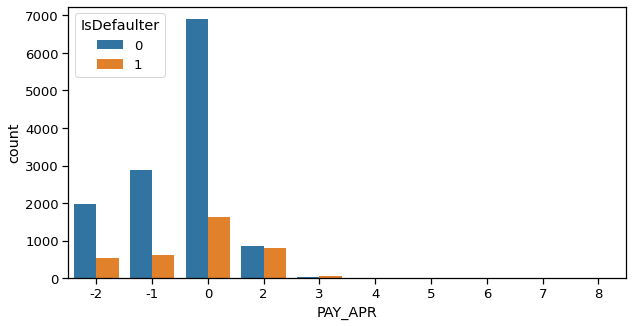

In [59]:
#plot for the pay month to deafulter
pay_col = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR']
for col in pay_col:
  plt.figure(figsize=(10,5))
  sns.countplot(x = col, hue = 'IsDefaulter', data = cred_df)

After carefull observation on the payment delay for the respective month we found that most credit card payment did by the customer.we see the distribution of the plot peak at 0 value on which means on the x scale no delay in the payment of card

**paid payment**

In [60]:
#preapre dataset for pair plot
pay_amnt_df = cred_df[['PAY_AMT_SEPT',	'PAY_AMT_AUG',	'PAY_AMT_JUL',	'PAY_AMT_JUN',	'PAY_AMT_MAY',	'PAY_AMT_APR', 'IsDefaulter']]

need to plot pair plot for all paid payment

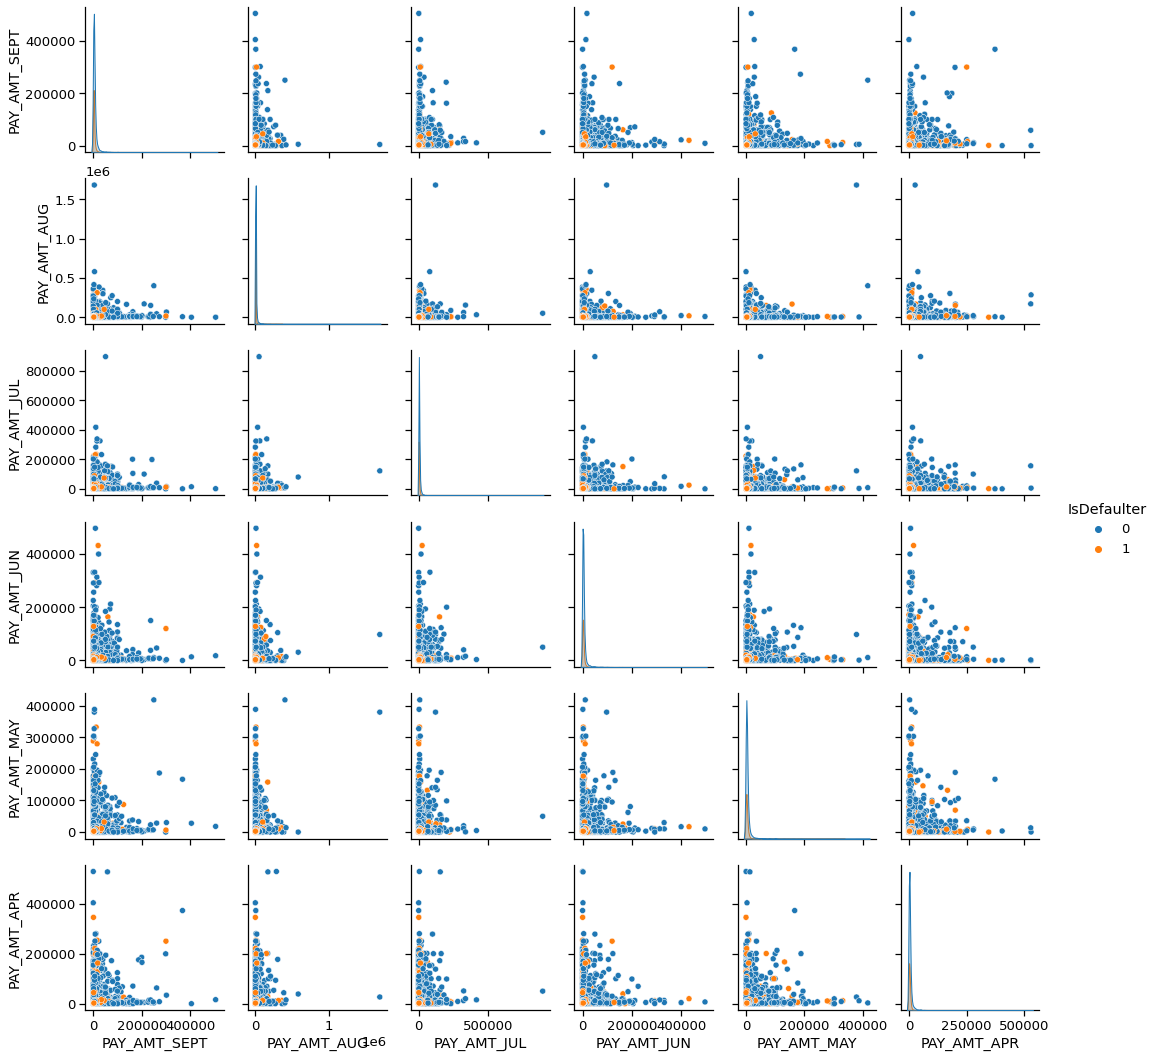

In [61]:
#pair plot
sns.pairplot(data = pay_amnt_df, hue='IsDefaulter')

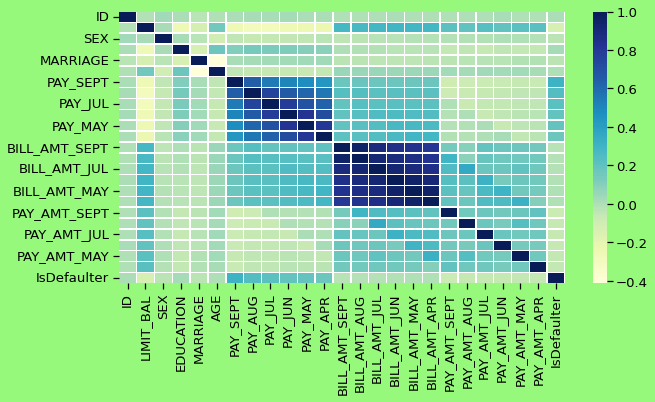

In [62]:
#correlation plot for multicollinearity relation
plt.figure(figsize=(10,5),edgecolor='k',facecolor='xkcd:light green')
sns.heatmap(cred_df.corr(),cmap='YlGnBu',linewidths=.5)

In [63]:
# data set before one hot coding
cred_df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [64]:
#shape of data set
cred_df.shape


(16382, 25)

In [65]:
#target variable value count
cred_df['IsDefaulter'].value_counts()

0    12679
1     3703
Name: IsDefaulter, dtype: int64

# **Now we need to take  mandatory action towrds the class Imbalance**
# **So to remediate Imbalance we are using SMOTE(Synthetic Minority Oversampling Technique)**

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()

# fit predictor and target variable
x_smote, y_smote = smote.fit_resample(cred_df.iloc[:,0:-1], cred_df['IsDefaulter'])

print('Original dataset shape', len(cred_df))
print('Resampled dataset shape', len(y_smote))

Original dataset shape 16382
Resampled dataset shape 25358


In [67]:
#array of dataset
x_smote

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR
0,1,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,120000,2,2,2,26,-1,2,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,3,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,4,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,5,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25353,6056,50000,1,2,2,43,1,0,0,0,...,3187,14500,10957,11695,1678,1075,11940,7929,1373,1358
25354,15475,30000,1,2,1,31,0,0,2,2,...,3441,2257,2264,1718,1050,1400,1400,280,0,350
25355,7309,40000,2,1,1,24,0,0,0,0,...,39352,37401,35217,34228,5126,7487,6933,3735,4801,5000
25356,8526,120165,1,2,2,25,-1,0,-1,-1,...,942,404,-157,49638,806,943,647,1176,53275,3885


In [68]:
#column after smote
columns = list(cred_df.columns)

In [69]:
#remove the target variable
columns.pop()

'IsDefaulter'

In [70]:
#dataframe of balance datset
balance_df = pd.DataFrame(x_smote, columns=columns)

In [71]:
#target variable
balance_df['IsDefaulter'] = y_smote

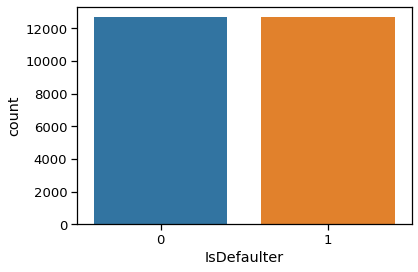

In [72]:
#plot for target variable after the smote
sns.countplot('IsDefaulter', data = balance_df)

In [73]:
#defaulter data
balance_df[balance_df['IsDefaulter']==1]

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
13,14,70000,1,2,2,30,1,2,2,0,...,66782,36137,36894,3200,0,3000,3000,1500,0,1
16,17,20000,1,1,2,24,0,0,2,2,...,18338,17905,19104,3200,0,1500,0,1650,0,1
21,22,120000,2,2,1,39,-1,-1,-1,-1,...,0,632,316,316,316,0,632,316,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25353,6056,50000,1,2,2,43,1,0,0,0,...,14500,10957,11695,1678,1075,11940,7929,1373,1358,1
25354,15475,30000,1,2,1,31,0,0,2,2,...,2257,2264,1718,1050,1400,1400,280,0,350,1
25355,7309,40000,2,1,1,24,0,0,0,0,...,37401,35217,34228,5126,7487,6933,3735,4801,5000,1
25356,8526,120165,1,2,2,25,-1,0,-1,-1,...,404,-157,49638,806,943,647,1176,53275,3885,1


# **Now time for Feature Engineering**

In [74]:
#creat a copy of data set
df_cred_fr = balance_df.copy()

In [75]:
#feature engg for payment month
df_cred_fr['Payement_Value'] = df_cred_fr['PAY_SEPT'] + df_cred_fr['PAY_AUG'] + df_cred_fr['PAY_JUL'] + df_cred_fr['PAY_JUN'] + df_cred_fr['PAY_MAY'] + df_cred_fr['PAY_APR']

In [76]:
#grouby for payment value defintion
df_cred_fr.groupby('IsDefaulter')['Payement_Value'].mean()

IsDefaulter
0   -1.856061
1    1.489707
Name: Payement_Value, dtype: float64

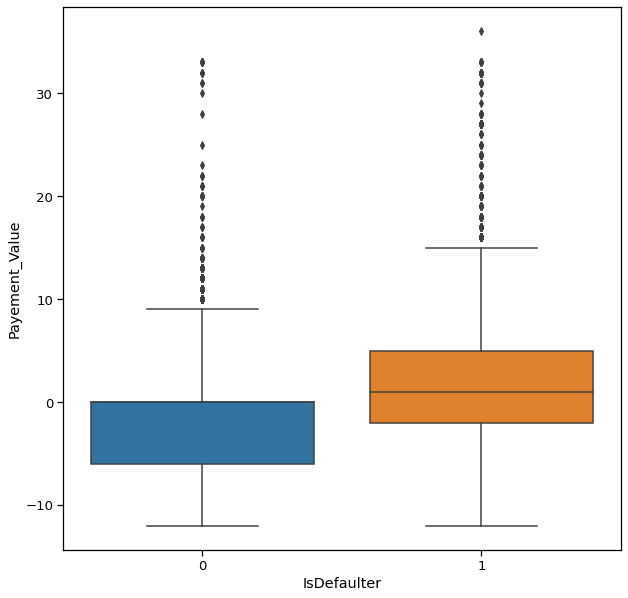

In [77]:
#box plot for outlier detection
plt.figure(figsize=(10,10))
sns.boxplot(data = df_cred_fr, x = 'IsDefaulter', y = 'Payement_Value' )

In [78]:
#for bill due
df_cred_fr['Dues'] = (df_cred_fr['BILL_AMT_APR']+df_cred_fr['BILL_AMT_MAY']+df_cred_fr['BILL_AMT_JUN']+df_cred_fr['BILL_AMT_JUL']+df_cred_fr['BILL_AMT_SEPT'])-(df_cred_fr['PAY_AMT_APR']+df_cred_fr['PAY_AMT_MAY']
+df_cred_fr['PAY_AMT_JUN']+df_cred_fr['PAY_AMT_JUL']+df_cred_fr['PAY_AMT_AUG']+df_cred_fr['PAY_AMT_SEPT'])

In [79]:
#groupby for effect analysis
df_cred_fr.groupby('IsDefaulter')['Dues'].mean()

IsDefaulter
0    180563.294424
1    187502.871599
Name: Dues, dtype: float64

In [80]:
#detecion for for education
df_cred_fr['EDUCATION'].unique()

array([2, 1, 3, 4])

In [81]:
#other allotment for consider range of value
df_cred_fr['EDUCATION']=np.where(df_cred_fr['EDUCATION'] == 6, 4, df_cred_fr['EDUCATION'])
df_cred_fr['EDUCATION']=np.where(df_cred_fr['EDUCATION'] == 0, 4, df_cred_fr['EDUCATION'])

In [82]:
#marriage detection
df_cred_fr['MARRIAGE'].unique()

array([1, 2, 3])

In [83]:
#other again it for the the describe range
df_cred_fr['MARRIAGE']=np.where(df_cred_fr['MARRIAGE'] == 0, 3, df_cred_fr['MARRIAGE'])

In [84]:
#assignmnet the value for diffrent categorie
df_cred_fr.replace({'SEX': {1 : 'MALE', 2 : 'FEMALE'}, 'EDUCATION' : {1 : 'graduate school', 2 : 'university', 3 : 'high school', 4 : 'others'}, 'MARRIAGE' : {1 : 'married', 2 : 'single', 3 : 'others'}}, inplace = True)

In [85]:
#data set after feature engg
df_cred_fr.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,...,BILL_AMT_APR,PAY_AMT_SEPT,PAY_AMT_AUG,PAY_AMT_JUL,PAY_AMT_JUN,PAY_AMT_MAY,PAY_AMT_APR,IsDefaulter,Payement_Value,Dues
0,1,20000,FEMALE,university,married,24,2,2,-1,-1,...,0,0,689,0,0,0,0,1,-2,3913
1,2,120000,FEMALE,university,single,26,-1,2,0,0,...,3261,0,1000,1000,1000,0,2000,1,3,10352
2,3,90000,FEMALE,university,single,34,0,0,0,0,...,15549,1518,1500,1000,1000,1000,5000,0,0,76608
3,4,50000,FEMALE,university,married,37,0,0,0,0,...,29547,2000,2019,1200,1100,1069,1000,0,0,174713
4,5,50000,MALE,university,married,57,-1,0,-1,0,...,19131,2000,36681,10000,9000,689,679,0,-2,44620


Data is ready for one hot coding

In [86]:
#one hot coding 
df_cred_fr = pd.get_dummies(df_cred_fr,columns=['EDUCATION','MARRIAGE'])

In [87]:
#data set after one hot coding
df_cred_fr.head()

,ID,LIMIT_BAL,SEX,AGE,PAY_SEPT,PAY_AUG,PAY_JUL,PAY_JUN,PAY_MAY,PAY_APR,...,IsDefaulter,Payement_Value,Dues,EDUCATION_graduate school,EDUCATION_high school,EDUCATION_others,EDUCATION_university,MARRIAGE_married,MARRIAGE_others,MARRIAGE_single
0,1,20000,FEMALE,24,2,2,-1,-1,-2,-2,...,1,-2,3913,0,0,0,1,1,0,0
1,2,120000,FEMALE,26,-1,2,0,0,0,2,...,1,3,10352,0,0,0,1,0,0,1
2,3,90000,FEMALE,34,0,0,0,0,0,0,...,0,0,76608,0,0,0,1,0,0,1
3,4,50000,FEMALE,37,0,0,0,0,0,0,...,0,0,174713,0,0,0,1,1,0,0
4,5,50000,MALE,57,-1,0,-1,0,0,0,...,0,-2,44620,0,0,0,1,1,0,0


In [88]:
#drop the hot codded main column
df_cred_fr.drop(['EDUCATION_others','MARRIAGE_others'],axis = 1, inplace = True)

In [89]:
#one hot coding for payment month
df_cred_fr = pd.get_dummies(df_cred_fr, columns = ['PAY_SEPT',	'PAY_AUG',	'PAY_JUL',	'PAY_JUN',	'PAY_MAY',	'PAY_APR'], drop_first = True )

In [90]:
#data set is ready almost
df_cred_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,FEMALE,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,FEMALE,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,FEMALE,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,FEMALE,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,MALE,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [91]:
# LABEL ENCODING FOR SEX
encoders_nums = {"SEX":{"FEMALE": 0, "MALE": 1}}
df_cred_fr = df_cred_fr.replace(encoders_nums)

In [92]:
#again inspection
df_cred_fr.head()

,ID,LIMIT_BAL,SEX,AGE,BILL_AMT_SEPT,BILL_AMT_AUG,BILL_AMT_JUL,BILL_AMT_JUN,BILL_AMT_MAY,BILL_AMT_APR,...,PAY_APR_-1,PAY_APR_0,PAY_APR_1,PAY_APR_2,PAY_APR_3,PAY_APR_4,PAY_APR_5,PAY_APR_6,PAY_APR_7,PAY_APR_8
0,1,20000,0,24,3913,3102,689,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,120000,0,26,2682,1725,2682,3272,3455,3261,...,0,0,0,1,0,0,0,0,0,0
2,3,90000,0,34,29239,14027,13559,14331,14948,15549,...,0,1,0,0,0,0,0,0,0,0
3,4,50000,0,37,46990,48233,49291,28314,28959,29547,...,0,1,0,0,0,0,0,0,0,0
4,5,50000,1,57,8617,5670,35835,20940,19146,19131,...,0,1,0,0,0,0,0,0,0,0


In [93]:
#now data set ready for the model deployment
df_cred_fr.drop('ID',axis = 1, inplace = True)

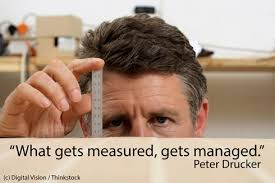

# Data is ready to feed as input in our models 

# **Steps**

**Logistic Regression Classifier Algorithm**

LR Classifier Generator 

LR Hyper Parameter Tuning : GridSearch

Final Logistic Regression Training run

**K Nearest Neighbours Classifier Algorithm**

Default Parameters : KNeighborsClassifier

KNN Model Generator Funciton

KNN Hyper Parameter Tuning : GridSearch

Final KNN Training run

**Random Forrests of Decsision Trees**

Default Parameters : RandomForestClassifier

Base Estimator Generator Function

HyperParameter tuning using GridSearchCV

Final Training Run

**Gradient Boosted Trees using XGBoost Library**

XGBoost algorithn training and tuning notes

XGBoost Estimator Instance Generator Function

HyperParameter tuning using BayesSearchCV

Final Training Run for XGBoost

Feature Importance

**SVM(support vector machine)**

Default Parameters : SvmClassifier

SVM Model Generator Funciton

SVM Hyper Parameter Tuning : GridSearch

Final SVM Training run

# Implementing Logistic Regression

Logistic Regression is one of the simplest algorithms which estimates the relationship 

1- one dependent binary variable and independent variables 

2-computing the probability of occurrence of an event. 

3-The regulation parameter C controls the trade-off between increasing complexity (overfitting) and keeping the model simple (underfitting). For large values of C 

4-the power of regulation is reduced and the model increases its complexity, thus overfitting the data.


In [94]:
# creat a copy of data set for the model evaluation
df_cred_logreg = df_cred_fr.copy()

In [95]:
# dependent and target variable
X = df_cred_logreg.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_cred_logreg['IsDefaulter']

In [96]:
#for scaling the data set
columns = X.columns

In [97]:
#scaling the indepenndetn variable
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [98]:
#train test split for furter model score evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [99]:
#setting the learning peramete or l1  and l2 parameter
param_grid = {'penalty':['l1','l2'], 'C' : [0.001, 0.01, 0.1, 1, 10, 100, 1000] }

In [100]:
#parameter setup for grid cv
grid_lr_clf = GridSearchCV(LogisticRegression(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_lr_clf.fit(X_train, y_train)

Fitting 3 folds for each of 14 candidates, totalling 42 fits


/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
21 fits failed out of a total of 42.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
21 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py", line 449, in _check_solver
    % (solver, penalty)
ValueError: Solver

GridSearchCV(cv=3, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=3)

In [101]:
#optimized clf
optimized_clf = grid_lr_clf.best_estimator_

In [102]:
#best parameter 
grid_lr_clf.best_params_

{'C': 1000, 'penalty': 'l2'}

In [103]:
#score of logistic regression after grid search
grid_lr_clf.best_score_

0.742892459826947

In [104]:
# Predicted Probability
train_preds = optimized_clf.predict_proba(X_train)[:,1]
test_preds = optimized_clf.predict_proba(X_test)[:,1]

In [105]:
# Get the predicted classes
train_class_preds = optimized_clf.predict(X_train)
test_class_preds = optimized_clf.predict(X_test)

In [106]:
# Get the accuracy scores
train_accuracy_lr = accuracy_score(train_class_preds,y_train)
test_accuracy_lr = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7447760315498264
The accuracy on test data is  0.7446528856494204


In [107]:
#evaluate the model performance
test_accuracy_lr = accuracy_score(test_class_preds,y_test)
test_precision_score_lr = precision_score(test_class_preds,y_test)
test_recall_score_lr = recall_score(test_class_preds,y_test)
test_f1_score_lr = f1_score(test_class_preds,y_test)
test_roc_score_lr = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_lr)
print("The precision on test data is ", test_precision_score_lr)
print("The recall on test data is ", test_recall_score_lr)
print("The f1 on test data is ", test_f1_score_lr)
print("The roc_score on test data is ", test_roc_score_lr)

The accuracy on test data is  0.7446528856494204
The precision on test data is  0.6945506692160612
The recall on test data is  0.7718459495351926
The f1 on test data is  0.731161152346207
The roc_score on test data is  0.7471306202932262


[[6823 1671]
 [2665 5830]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

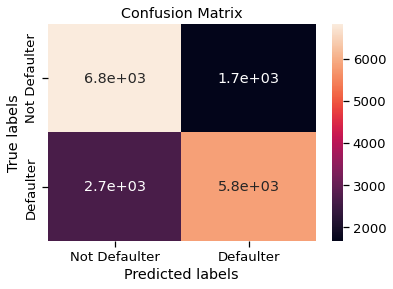

In [108]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

**Type I error and Type II error**
We need to clarify that confussion matrix are not a very good tool to represent the results in the case of largely unbalanced data, because we will actually need a different metrics that accounts in the same time for the selectivity and specificity of the method we are using, so that we minimize in the same time both Type I errors and Type II errors.

**Null Hypothesis (H0)** - The transaction is not a fraud.
Alternative Hypothesis (H1) - The transaction is a fraud.

**Type I error**-You reject the null hypothesis when the null hypothesis is actually true.

**Type II error**- You fail to reject the null hypothesis when the the alternative hypothesis is true.

**Cost of Type I error**- You erroneously presume that the the transaction is a fraud, and a true transaction is rejected.

**Cost of Type II error** - You erroneously presume that the transaction is not a fraud and a ffraudulent transaction is accepted.

In [109]:
#important feature
feature_importance = pd.DataFrame({'Features':columns, 'Importance':np.abs(optimized_clf.coef_).ravel() })

In [110]:
#sort the features 
feature_importance = feature_importance.sort_values(by = 'Importance', ascending=False)[:10]

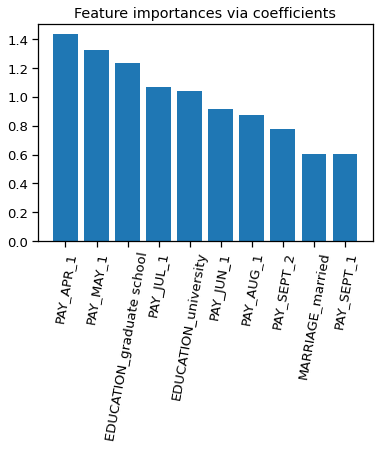

In [111]:
#plot for important features
plt.bar(height=feature_importance['Importance'], x= feature_importance['Features'])
plt.xticks(rotation=80)
plt.title("Feature importances via coefficients")
plt.show()

In [112]:
#test data set predication
y_preds_proba_lr = optimized_clf.predict_proba(X_test)[::,1]

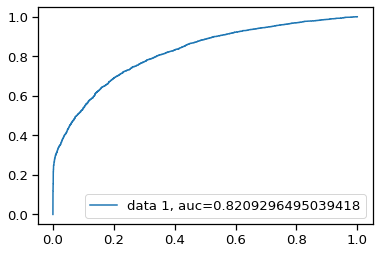

In [113]:
#ploting roc area under curv
y_pred_proba = y_preds_proba_lr
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# Implementing K-NN 

In [114]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier

#Setup arrays to store training and test accuracies
neighbors = np.arange(1,9)
train_accuracy =np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

for i,k in enumerate(neighbors):
    # Setup a knn classifier with k neighbors
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Fit the model
    knn.fit(X_train, y_train)
    
    # Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train, y_train)
    
    # Compute accuracy on the test set
    test_accuracy[i] = knn.score(X_test, y_test)

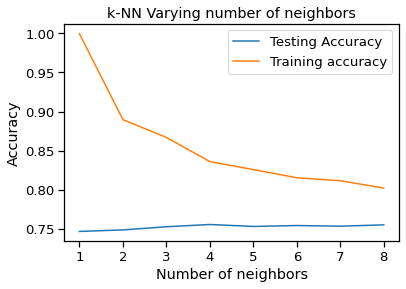

In [115]:
# Generate plot
plt.title('k-NN Varying number of neighbors')
plt.plot(neighbors, test_accuracy, label='Testing Accuracy')
plt.plot(neighbors, train_accuracy, label='Training accuracy')
plt.legend()
plt.xlabel('Number of neighbors')
plt.ylabel('Accuracy')
plt.show()

In [116]:
# Setup a knn classifier with k neighbors
knn = KNeighborsClassifier(n_neighbors=7)

In [117]:
# Fit the model
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [118]:
#knn evaluate only on test data
knn.score(X_test,y_test)

0.753614529812403

In [119]:
# Import confusion_matrix
from sklearn.metrics import confusion_matrix,roc_curve

In [120]:
# Let us get the predictions using the classifier we had fit above
y_pred = knn.predict(X_test)

In [121]:
#confusion matrrix for the performance evaluation
confusion_matrix(y_test,y_pred)

array([[3180, 1005],
       [1057, 3127]])

In [122]:
#ypred for knn
y_pred_proba = knn.predict_proba(X_test)[:,1]

In [123]:
#roc-auc curv parameters
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

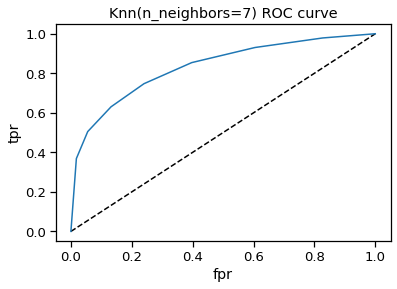

In [124]:
#roc-auc plot for knn
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=7) ROC curve')
plt.show()

In [125]:
# Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.8319455009811514

In [126]:
# In case of classifier like knn the parameter to be tuned is n_neighbors
param_grid = {'n_neighbors':np.arange(1,5)}

In [127]:
#grid search cv for knn
knn = KNeighborsClassifier()
knn_cv= GridSearchCV(knn,param_grid,cv=5)
knn_cv.fit(X,y)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([1, 2, 3, 4])})

In [128]:
#knn score after training 
knn_cv.best_score_

0.747065160524962

In [129]:
#knn best nearest neighbour
knn_cv.best_params_

{'n_neighbors': 1}

In [130]:
#optimal knn after best estimator
optimal_knn_clf = knn_cv.best_estimator_

In [131]:
# Get the predicted classes
train_class_preds = optimal_knn_clf.predict(X_train)
test_class_preds = optimal_knn_clf.predict(X_test)

[[4182    3]
 [   5 4179]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

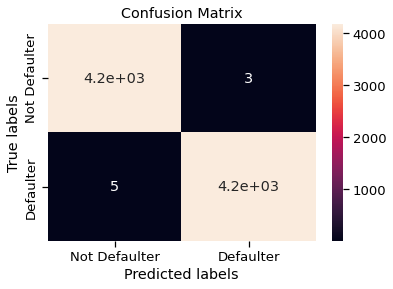

In [132]:
# Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_test, test_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [133]:
#test data set predication
y_preds_proba_knn = optimal_knn_clf.predict_proba(X_test)[::,1]

# **Implementing the Decision Tree**

Decision Tree is another very popular algorithm for classification problems because it is easy to interpret and understand. An internal node represents a feature, the branch represents a decision rule, and each leaf node represents the outcome. Some advantages of decision trees are that they require less data preprocessing, i.e., no need to normalize features. However, noisy data can be easily overfitted and results in biased results when the data set is imbalanced.

In [134]:
#parameters for decision tree
param_grid = {'max_depth': [20,30,50,100], 'min_samples_split':[0.1,0.2,0.4]}

In [135]:
#dependent and independent varaible
X = df_cred_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_cred_fr['IsDefaulter']

In [136]:
#train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [137]:
#evaluation with gridsearch cv
grid_dc_clf = GridSearchCV(DecisionTreeClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_dc_clf.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': [20, 30, 50, 100],
                         'min_samples_split': [0.1, 0.2, 0.4]},
             scoring='accuracy', verbose=3)

In [138]:
#score of dt
grid_dc_clf.best_score_

0.7086938607334158

In [139]:
#optimal classifier
optimal_dc_clf = grid_dc_clf.best_estimator_

In [140]:
# Get the predicted classes
train_class_preds = optimal_dc_clf.predict(X_train)
test_class_preds = optimal_dc_clf.predict(X_test)

In [141]:
#best parameter
grid_dc_clf.best_params_

{'max_depth': 50, 'min_samples_split': 0.1}

In [142]:
# Get the accuracy scores
train_accuracy_dc = accuracy_score(train_class_preds,y_train)
test_accuracy_dc = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_dc)
print("The accuracy on test data is ", test_accuracy_dc)

The accuracy on train data is  0.7139914062040144
The accuracy on test data is  0.7080893774644521


In [143]:
#predicted value
y_pred_proba_dc = grid_dc_clf.predict_proba(X_test)[:,1]

In [144]:
#calculation for auc-roc area
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

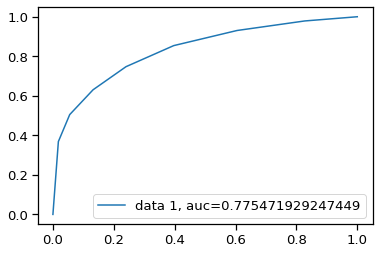

In [145]:
#plot for auc-roc curv
auc = roc_auc_score(y_test, y_pred_proba_dc)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Implementing Random Forest Classifier**

### Random Forest Classification
Random Forest is a supervised learning algorithm, it creates a forest and makes it somehow random. The "forest“ it builds, is an ensemble of Decision Trees.

**Step1:-** Pick at random K data points from the training set

**Step2:-** Build the Decision tree associated to these K data points

**Step3:-** Choose the Number of trees(n) you want to build and repeat STEP1 and STEP2

**Step4:-** For a new data points make each one of your 'n' trees predict the category to which the data point belongs and assign the new data point to the category that wins the majority vote 

In [146]:
#random forest classifier model fit
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train,y_train)

RandomForestClassifier()

In [147]:
# Get the predicted classes
train_class_preds = rf_clf.predict(X_train)
test_class_preds = rf_clf.predict(X_test)

In [148]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994702454529402
The accuracy on test data is  0.8257856374716215


In [149]:
#model score evaluation
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.8257856374716215
The precision on test data is  0.7954110898661568
The recall on test data is  0.8468193384223919
The f1 on test data is  0.8203105743159971
The roc_score on test data is  0.8269915570237665


We can see from above results that we are getting  around 99% train accuracy and 83% for test accuracy which depicts that model is overfitting. However our f1-score is around 82%, which is not bad.

# Grid search CV for random forest

In [150]:
#gride search cv parameter set
param_grid = {'n_estimators': [100,150,200], 'max_depth': [10,20,30]}

In [151]:
#fitting data for gride search cv
grid_rf_clf = GridSearchCV(RandomForestClassifier(), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_rf_clf.fit(X_train, y_train)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'n_estimators': [100, 150, 200]},
             scoring='accuracy', verbose=3)

In [152]:
#score after gdcv
grid_rf_clf.best_score_

0.815292247925128

In [153]:
#bes parameter
grid_rf_clf.best_params_

{'max_depth': 30, 'n_estimators': 100}

In [154]:
#optimal estimator
optimal_rf_clf = grid_rf_clf.best_estimator_

In [155]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [156]:
# Get the accuracy scores
train_accuracy_rf = accuracy_score(train_class_preds,y_train)
test_accuracy_rf = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_rf)
print("The accuracy on test data is ", test_accuracy_rf)

The accuracy on train data is  0.9994113838366001
The accuracy on test data is  0.82650256900466


In [157]:
#model score evaluation after training with gdcv
test_accuracy_rf = accuracy_score(test_class_preds,y_test)
test_precision_score_rf = precision_score(test_class_preds,y_test)
test_recall_score_rf = recall_score(test_class_preds,y_test)
test_f1_score_rf = f1_score(test_class_preds,y_test)
test_roc_score_rf = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_rf)
print("The precision on test data is ", test_precision_score_rf)
print("The recall on test data is ", test_recall_score_rf)
print("The f1 on test data is ", test_f1_score_rf)
print("The roc_score on test data is ", test_roc_score_rf)

The accuracy on test data is  0.82650256900466
The precision on test data is  0.7997131931166348
The recall on test data is  0.8449494949494949
The f1 on test data is  0.8217092337917484
The roc_score on test data is  0.8274418601987211


In [158]:
#lenght of feature importance
len(optimal_rf_clf.feature_importances_)

80

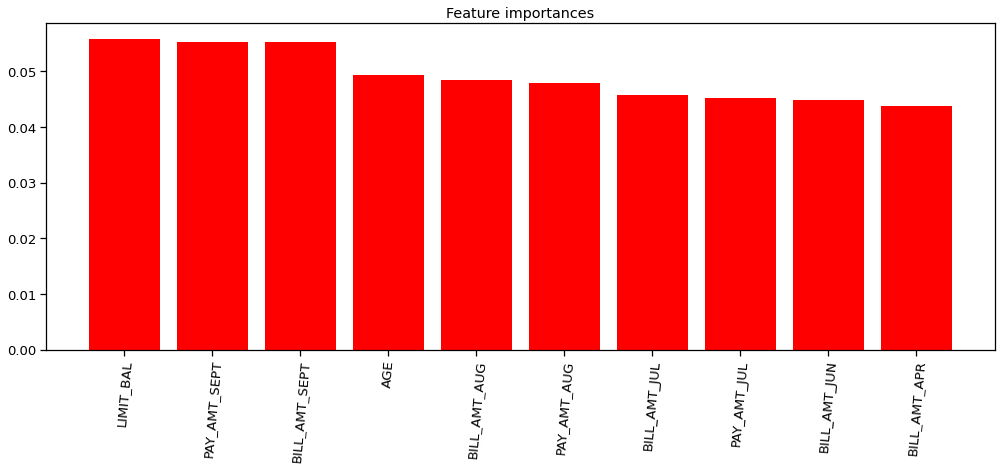

In [159]:
# Feature Importance
feature_importances_rf = pd.DataFrame(optimal_rf_clf.feature_importances_,
                                   index = columns,
                                    columns=['importance_rf']).sort_values('importance_rf',
                                                                        ascending=False)[:10]
                                    
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_rf.index, feature_importances_rf['importance_rf'],
        color="r",  align="center")
plt.xticks(feature_importances_rf.index, rotation = 85)
#plt.xlim([-1, X.shape[1]])
plt.show()

In [160]:
# Get the predicted classes
train_class_preds = optimal_rf_clf.predict(X_train)
test_class_preds = optimal_rf_clf.predict(X_test)

In [161]:
#predicted value
y_preds_proba_rf = optimal_rf_clf.predict_proba(X_test)[::,1]

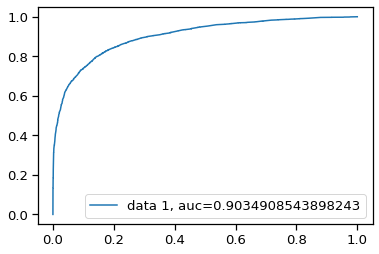

In [162]:
#roc-auc score for  random forest
y_pred_proba = y_preds_proba_rf
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

auc score .91%  which is good  models performance

# Implement the XGBoost

In [163]:
#import lightgbm and xgboost 
import lightgbm as lgb 
import xgboost as xgb

In [164]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
dtrain=xgb.DMatrix(X_train,label=y_train)
dtest=xgb.DMatrix(X_test)

In [165]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [166]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

In [167]:
#Execution time of the model 
execution_time_xgb = stop-start 
execution_time_xgb

datetime.timedelta(seconds=2, microseconds=756954)

In [168]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest) 

In [169]:
#length of pred prob
len(train_class_preds_probs)

16989

In [170]:
#evaluation from thresold value
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [171]:
#print the array of pred prob
test_class_preds_probs[:20]

array([0.38793173, 0.24957016, 0.9498039 , 0.4612043 , 0.6630697 ,
       0.4548512 , 0.26857919, 0.6480066 , 0.6133337 , 0.24809855,
       0.21820708, 0.23293035, 0.22036861, 0.46507603, 0.26156905,
       0.65828425, 0.3246958 , 0.9121627 , 0.8979886 , 0.3386076 ],
      dtype=float32)

In [172]:
#array of tes pred
test_class_preds[:20]

[0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0]

In [173]:
#length of y train
len(y_train)

16989

In [174]:
#lenght of train class pred
len(train_class_preds)

16989

In [175]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.7838601447995762
The accuracy on test data is  0.7721352610825666


In [176]:
#model evaluation before gdcv
test_accuracy_xgb = accuracy_score(test_class_preds,y_test)
test_precision_xgb = precision_score(test_class_preds,y_test)
test_recall_score_xgb = recall_score(test_class_preds,y_test)
test_f1_score_xgb = f1_score(test_class_preds,y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.7721352610825666
The precision on test data is  0.7105640535372849
The recall on test data is  0.8103025347506132
The f1 on test data is  0.7571628676938749
The roc_score on train data is  0.776321480141264


# Grid Search CV

In [178]:
#grid search cv for xgboost
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(colsample_bytree=0.8, max_depth=5,
                                     n_estimators=140, nthread=4, seed=27,
                                     subsample=0.8),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [179]:
#gdcv score after training model on the data set
gsearch1.best_score_

0.8154688327741481

In [180]:
#optimal xgb
optimal_xgb = gsearch1.best_estimator_

In [181]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [182]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9491435634822533
The accuracy on test data is  0.8248297287609033


In [183]:
#model score for xgboost
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on test data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.8248297287609033
The precision on test data is  0.7915869980879541
The recall on test data is  0.847926267281106
The f1 on test data is  0.8187886279357232
The roc_score on test data is  0.8262709983055766


In [184]:
#important features respect to Xgb
pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
PAY_AUG_1,0.166458
PAY_JUL_1,0.106869
PAY_SEPT_2,0.062564
PAY_AUG_2,0.057996
PAY_APR_1,0.055346
PAY_MAY_1,0.045361
PAY_JUN_1,0.044792
MARRIAGE_married,0.031416
PAY_SEPT_1,0.030126
SEX,0.029908


In [185]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                   index = columns,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

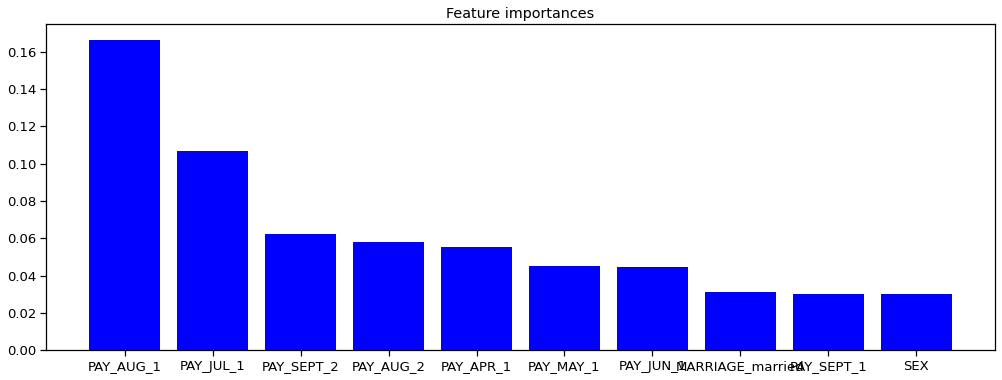

In [186]:
#plot for the important feature selection by xgb
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.show()

In [187]:
#y pred after training the model by gdcv
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

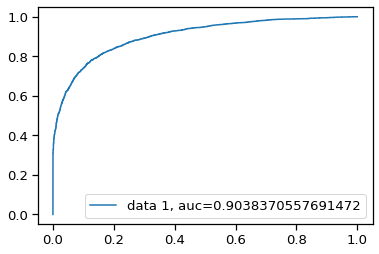

In [210]:
#plot for the auc-roc for xgb
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **SVM (support vector machine)**

In [188]:
# defining parameter range 
param_grid = {'C': [0.1, 1, 10, 100],   
              'kernel': ['rbf']} 

In [189]:
#dependent and independent variable 
X = df_cred_fr.drop(['IsDefaulter','Payement_Value','Dues'],axis=1)
y = df_cred_fr['IsDefaulter']

In [190]:
#scale data set for svm
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [191]:
#train test split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [192]:
#grid search cv for training SVM model
grid_clf = GridSearchCV(SVC(probability=True), param_grid, scoring = 'accuracy', n_jobs = -1, verbose = 3, cv = 3)
grid_clf.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:705: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=3, estimator=SVC(probability=True), n_jobs=-1,
             param_grid={'C': [0.1, 1, 10, 100], 'kernel': ['rbf']},
             scoring='accuracy', verbose=3)

In [193]:
#optimal svm with best estimator
optimal_SVC_clf = grid_clf.best_estimator_

In [194]:
#best parmeter
grid_clf.best_params_

{'C': 10, 'kernel': 'rbf'}

In [195]:
#model score after training
grid_clf.best_score_

0.7688504326328801

In [196]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [197]:
# Get the accuracy scores
train_accuracy_SVC = accuracy_score(train_class_preds,y_train)
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)

print("The accuracy on train data is ", train_accuracy_lr)
print("The accuracy on test data is ", test_accuracy_lr)

The accuracy on train data is  0.7447760315498264
The accuracy on test data is  0.7446528856494204


In [198]:
#model score after training 
test_accuracy_SVC = accuracy_score(test_class_preds,y_test)
test_precision_score_SVC = precision_score(test_class_preds,y_test)
test_recall_score_SVC = recall_score(test_class_preds,y_test)
test_f1_score_SVC = f1_score(test_class_preds,y_test)
test_roc_score_SVC = roc_auc_score(test_class_preds,y_test)

print("The accuracy on test data is ", test_accuracy_SVC)
print("The precision on test data is ", test_precision_score_SVC)
print("The recall on test data is ", test_recall_score_SVC)
print("The f1 on test data is ", test_f1_score_SVC)
print("The roc_score on test data is ", test_roc_score_SVC)

The accuracy on test data is  0.7760783845142789
The precision on test data is  0.7215583173996176
The recall on test data is  0.8098175965665236
The f1 on test data is  0.76314459049545
The roc_score on test data is  0.7793970551244598


 around 80% train accuracy and 78% for test accuracy which is not bad. But f1- score is 76% approx, so there might be more ground for improvement. 

[[7468 1026]
 [2233 6262]]


[Text(0, 0.5, 'Not Defaulter'), Text(0, 1.5, 'Defaulter')]

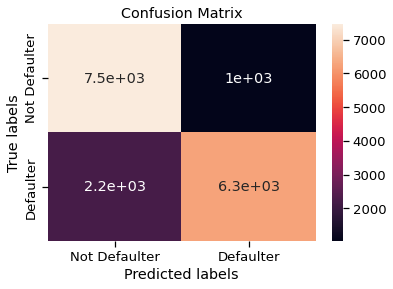

In [199]:
 # Get the confusion matrix for both train and test

labels = ['Not Defaulter', 'Defaulter']
cm = confusion_matrix(y_train, train_class_preds)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [200]:
#optimal svm
optimal_SVC_clf

SVC(C=10, probability=True)

In [201]:
# Get the predicted classes
train_class_preds = optimal_SVC_clf.predict(X_train)
test_class_preds = optimal_SVC_clf.predict(X_test)

In [202]:
#ypred on svc
y_pred_proba_SVC = optimal_SVC_clf.predict_proba(X_test)[::,1]

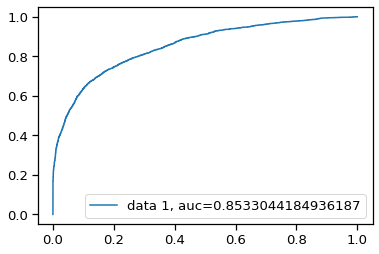

In [203]:
# ROC AUC CURVE
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba_SVC)
auc = roc_auc_score(y_test, y_pred_proba_SVC)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

# **Model Evaluation**

In [204]:
#svv recall score
recall_score

<function sklearn.metrics._classification.recall_score>

In [205]:
#model score after training 
classifiers = ['Logistic Regression', 'SVC', 'Random Forest CLf', 'Xgboost Clf']
train_accuracy = [train_accuracy_lr,train_accuracy_SVC, train_accuracy_rf, train_accuracy_xgb_tuned]
test_accuracy = [test_accuracy_lr,test_accuracy_SVC, test_accuracy_rf, test_accuracy_xgb_tuned]
precision_score = [test_precision_score_lr,test_precision_score_SVC, test_precision_score_rf, test_precision_xgb_tuned]
recall_score = [test_recall_score_lr,test_recall_score_SVC, test_recall_score_rf, test_recall_score_xgb_tuned]
f1_score = [test_f1_score_lr,test_f1_score_SVC, test_f1_score_rf, test_f1_score_xgb_tuned]
classifiers
recall_score

[0.7718459495351926, 0.8098175965665236, 0.8449494949494949, 0.847926267281106]

In [206]:
#creat data frame for all model score
pd.DataFrame({'Classifier':classifiers,'Train Accuracy': train_accuracy, 'Test Accuracy': test_accuracy, 'Precision Score': precision_score, 'Recall Score': recall_score, 'F1 Score': f1_score })

,Classifier,Train Accuracy,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.744776,0.744653,0.694551,0.771846,0.731161
1,SVC,0.808170,0.776078,0.721558,0.809818,0.763145
2,Random Forest CLf,0.999411,0.826503,0.799713,0.844949,0.821709
3,Xgboost Clf,0.949144,0.824830,0.791587,0.847926,0.818789


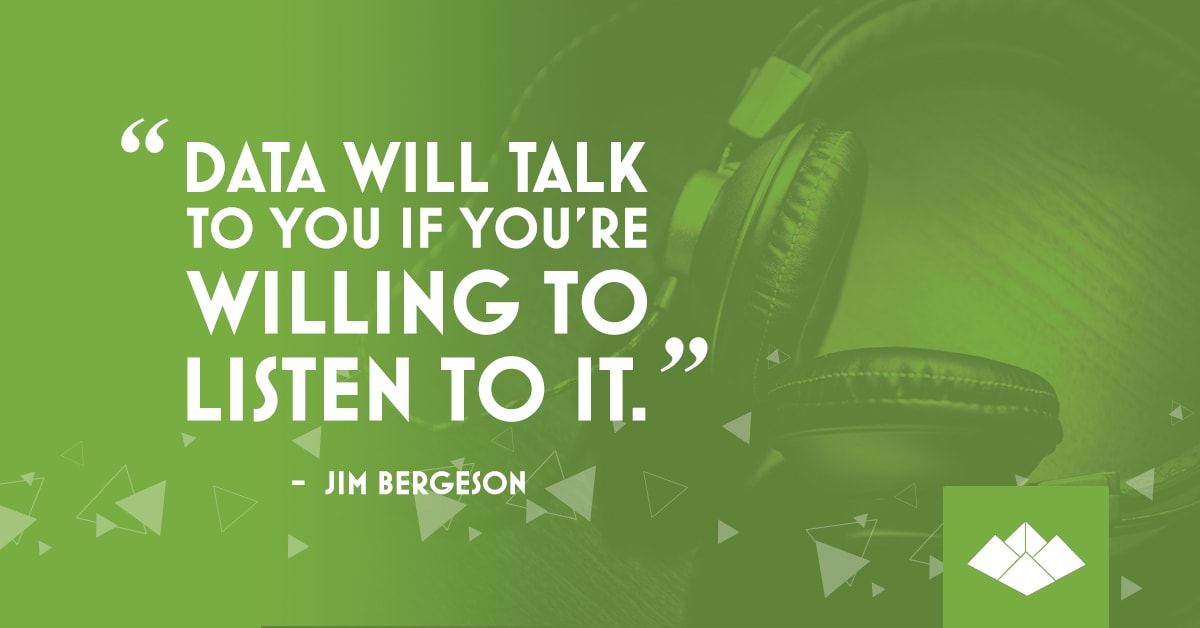

# Plotting ROC AUC for all the models

In [207]:
#area under the  auc-roc curve for all models
classifiers_proba = [(optimized_clf, y_preds_proba_lr), 
               (optimal_rf_clf, y_preds_proba_rf), 
               (optimal_xgb, y_preds_proba_xgb),(optimal_SVC_clf,y_pred_proba_SVC),
               ]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for pair in classifiers_proba:
    
    fpr, tpr, _ = roc_curve(y_test,  pair[1])
    auc = roc_auc_score(y_test, pair[1])
    
    result_table = result_table.append({'classifiers':pair[0].__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

In [208]:
#print result table
result_table

,fpr,tpr,auc
classifiers,,,
LogisticRegression,"[0.0, 0.0, 0.0, 0.00023894862604540023, 0.0002...","[0.0, 0.0002390057361376673, 0.056883365200764...",0.820930
RandomForestClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.04445506692160612, 0.04517208413001912...",0.903491
XGBClassifier,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...","[0.0, 0.0002390057361376673, 0.008126195028680...",0.903837
SVC,"[0.0, 0.0, 0.0, 0.00023894862604540023, 0.0002...","[0.0, 0.0002390057361376673, 0.166586998087954...",0.853304


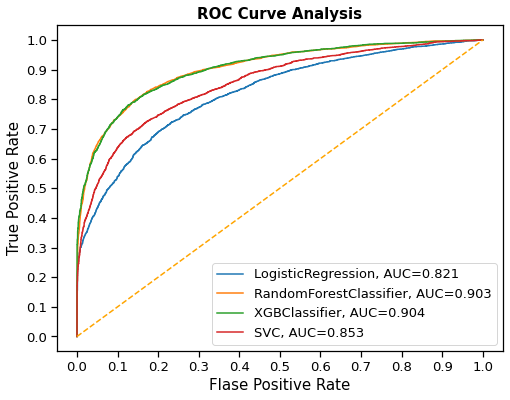

In [209]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

# **Conclusion**

We investigated the data, checking for data unbalancing, visualizing the features, and understanding the relationship between different features. We then investigated two predictive models. The data was split into three parts, a train set, a validation set, and a test set. For the first three models, we only used the train and test set.

We started with Logistic Classifier and then with RandomForrestClassifier, for which we obtained an AUC code of 0.81 and 0.91, respectively, when predicting the target for the test set.

We followed with an knn model, with a lower Roc score (0.83) for the prediction of the test set target values.

We then followed with a SVM, with the AUC score after training  iterations 0.85.

We then experimented with an XGBoost model. In this case, we used the validation set for validation of the training model. The best validation score obtained was 0.912. Then we used the model with the best training step to predict the target value from the test data; the AUC score obtained was 0.910 which is less then the validation score of random forest .random forest perform best in this problem data set with higest recall more then 86% and precision is also high for random forest and highest AUC score of around 0.912.so over all Random forest is the winner from the all the remaining model.